# Exploratory Data Analysis

#### Amazon Book Reviews DataFrame

I obtain a dataset of 8.9 million book reviews courtesy of Julian McAuley, UCSC. For the purposes of this notebook, we will examine only 15,000 rows.

http://jmcauley.ucsd.edu/data/amazon/

## Examine Data

In [175]:
# Import pandas and numpy
import pandas as pd

# Open DataFrame with 15,000 rows
df = pd.read_csv('Amazon_Data_Frame.csv', nrows=15000)

# View DataFrame
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,000100039X,"[0, 0]",5.0,Spiritually and mentally inspiring! A book tha...,"12 16, 2012",A10000012B7CGYKOMPQ4L,Adam,Wonderful!,1355616000
1,1,000100039X,"[0, 2]",5.0,This is one my must have books. It is a master...,"12 11, 2003",A2S166WSCFIFP5,"adead_poet@hotmail.com ""adead_poet@hotmail.com""",close to god,1071100800
2,2,000100039X,"[0, 0]",5.0,This book provides a reflection that you can a...,"01 18, 2014",A1BM81XB4QHOA3,"Ahoro Blethends ""Seriously""",Must Read for Life Afficianados,1390003200
3,3,000100039X,"[0, 0]",5.0,I first read THE PROPHET in college back in th...,"09 27, 2011",A1MOSTXNIO5MPJ,Alan Krug,Timeless for every good and bad time in your l...,1317081600
4,4,000100039X,"[7, 9]",5.0,A timeless classic. It is a very demanding an...,"10 7, 2002",A2XQ5LZHTD4AFT,Alaturka,A Modern Rumi,1033948800


In [176]:
# Delete extraneous column
del df['Unnamed: 0']

In [177]:
# Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
asin              15000 non-null object
helpful           15000 non-null object
overall           15000 non-null float64
reviewText        14998 non-null object
reviewTime        15000 non-null object
reviewerID        15000 non-null object
reviewerName      14998 non-null object
summary           14999 non-null object
unixReviewTime    15000 non-null int64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.0+ MB


## Create New Columns

The following columns are created with the purpose of finding interesting and relevant numbers to determine a new category, 'Helpful_Score', primarily based on the percentage of helpful reviews and the total number of helpful reviews. Any column that may of use in helping to determine an overall 'Helpful_Score' will be added here.

In [178]:
# Import numpy
import numpy as np

# Convert helpful into list
import ast
myList = np.array(df.helpful.apply(lambda row: ast.literal_eval(row)).tolist())

# Separate list into distinct columns
df['Helpful_Votes'] = myList[:,0]
df['Total_Votes'] = myList[:,1]

In [179]:
# Create column for unhelpful votes
df['Unhelpful_Votes'] = df['Total_Votes']-df['Helpful_Votes']

# Create column for percentage of helpful votes
df['Helpful_Percentage'] = (df['Helpful_Votes']/df['Total_Votes']).fillna(0)
# fillna(0) will convert NaN to 0 when totalVotes == 0

# Create column for helpful votes above expected helpful votes
helpfulPercentage = 0.7426197720523914
# helpfulPercentage is mean percentage of Helpful_Votes (previously computed) over entire 8.9 million row dataset
df['Helpful_Above_Mean'] = df['Helpful_Votes']-df['Total_Votes']*helpfulPercentage

# Create column for length of review
df['Review_Length'] = df['reviewText'].str.len()

# Create column that sums helpful votes
df['Helpful_Votes_User'] = df.groupby('reviewerID')['Helpful_Votes'].transform('sum')

# Create column that sums total votes
df['Total_Votes_User'] = df.groupby('reviewerID')['Total_Votes'].transform('sum')

# Create column that sums unhelpful votes
df['Unhelpful_Votes_User'] = df.groupby('reviewerID')['Unhelpful_Votes'].transform('sum')

# Create column for user's percentage of helpful votes
df['User_Helpful_Percentage']=(df['Helpful_Votes_User']/df['Total_Votes_User']).fillna(0)
# fillna(0) will convert NaN to 0 when totalVotes_User == 0

# Create column for user's helpful votes above expected helpful votes
df['Helpful_Above_Mean_User'] = df['Helpful_Votes_User']-df['Total_Votes_User']*helpfulPercentage

# Create column that sums total reviews per book 
df['Total_Reviews_Book'] = df.groupby('asin')['asin'].transform('count')

# Create column that sums helpful votes per book
df['Helpful_Votes_Book'] = df.groupby('asin')['Helpful_Votes'].transform('sum')

# Create column that sums total votes per book
df['Total_Votes_Book'] = df.groupby('asin')['Total_Votes'].transform('sum')

# Create column to group rows by total votes
df['Vote_Group'] = "None"
# Label the column depending on number of total votes.
df.loc[(df['Total_Votes'] <= 5) & (df['Total_Votes'] > 0), 'Vote_Group'] = "1-5"
df.loc[(df['Total_Votes'] <= 15) & (df['Total_Votes'] > 5), 'Vote_Group'] = "6-15"
df.loc[(df['Total_Votes'] <= 25) & (df['Total_Votes'] > 15), 'Vote_Group'] = "16-25"
df.loc[df['Total_Votes'] >= 26, 'Vote_Group'] = "26-max"

# Show all columns
pd.set_option('display.max_columns', None)
# View updated DataFrame
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Helpful_Votes,Total_Votes,Unhelpful_Votes,Helpful_Percentage,Helpful_Above_Mean,Review_Length,Helpful_Votes_User,Total_Votes_User,Unhelpful_Votes_User,User_Helpful_Percentage,Helpful_Above_Mean_User,Total_Reviews_Book,Helpful_Votes_Book,Total_Votes_Book,Vote_Group
0,000100039X,"[0, 0]",5.0,Spiritually and mentally inspiring! A book tha...,"12 16, 2012",A10000012B7CGYKOMPQ4L,Adam,Wonderful!,1355616000,0,0,0,0.000000,0.000000,129.0,0,0,0,0.0,0.000000,206,1006,1418,None
1,000100039X,"[0, 2]",5.0,This is one my must have books. It is a master...,"12 11, 2003",A2S166WSCFIFP5,"adead_poet@hotmail.com ""adead_poet@hotmail.com""",close to god,1071100800,0,2,2,0.000000,-1.485240,268.0,0,3,3,0.0,-2.227859,206,1006,1418,1-5
2,000100039X,"[0, 0]",5.0,This book provides a reflection that you can a...,"01 18, 2014",A1BM81XB4QHOA3,"Ahoro Blethends ""Seriously""",Must Read for Life Afficianados,1390003200,0,0,0,0.000000,0.000000,202.0,0,0,0,0.0,0.000000,206,1006,1418,None
3,000100039X,"[0, 0]",5.0,I first read THE PROPHET in college back in th...,"09 27, 2011",A1MOSTXNIO5MPJ,Alan Krug,Timeless for every good and bad time in your l...,1317081600,0,0,0,0.000000,0.000000,831.0,0,0,0,0.0,0.000000,206,1006,1418,None
4,000100039X,"[7, 9]",5.0,A timeless classic. It is a very demanding an...,"10 7, 2002",A2XQ5LZHTD4AFT,Alaturka,A Modern Rumi,1033948800,7,9,2,0.777778,0.316422,813.0,8,10,2,0.8,0.573802,206,1006,1418,6-15


In [180]:
# Create reduced DataFrame that only includes reviews that include votes
df_sub = df[df['Total_Votes']!=0]

## Display Histograms

### All Rows

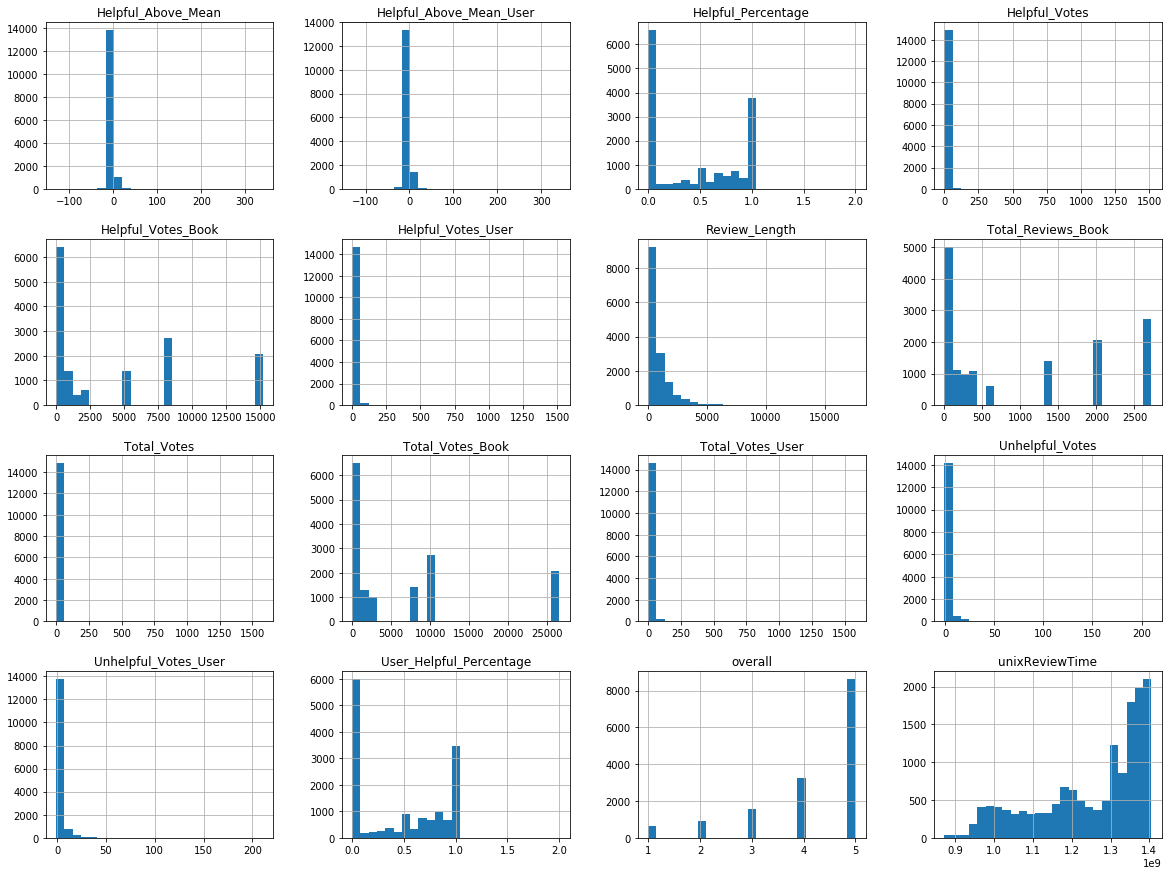

In [181]:
# Show plots inline
%matplotlib inline

#Import matplotlib
import matplotlib.pyplot as plt

# Create histograms for all numberical columns, set number of bins and size
df.hist(bins=25, figsize=(20,15))

# Show plot
plt.show()

The plots are very uneven. Many are biased toward 0. The 'overall' histogram reveals a strongly left skewed graph. Same with 'unixReviewTime'. 'Review_Length is a nice that is strongly right skewed. 'Helpful_Percentage' is very U-shaped.

### Rows With Votes

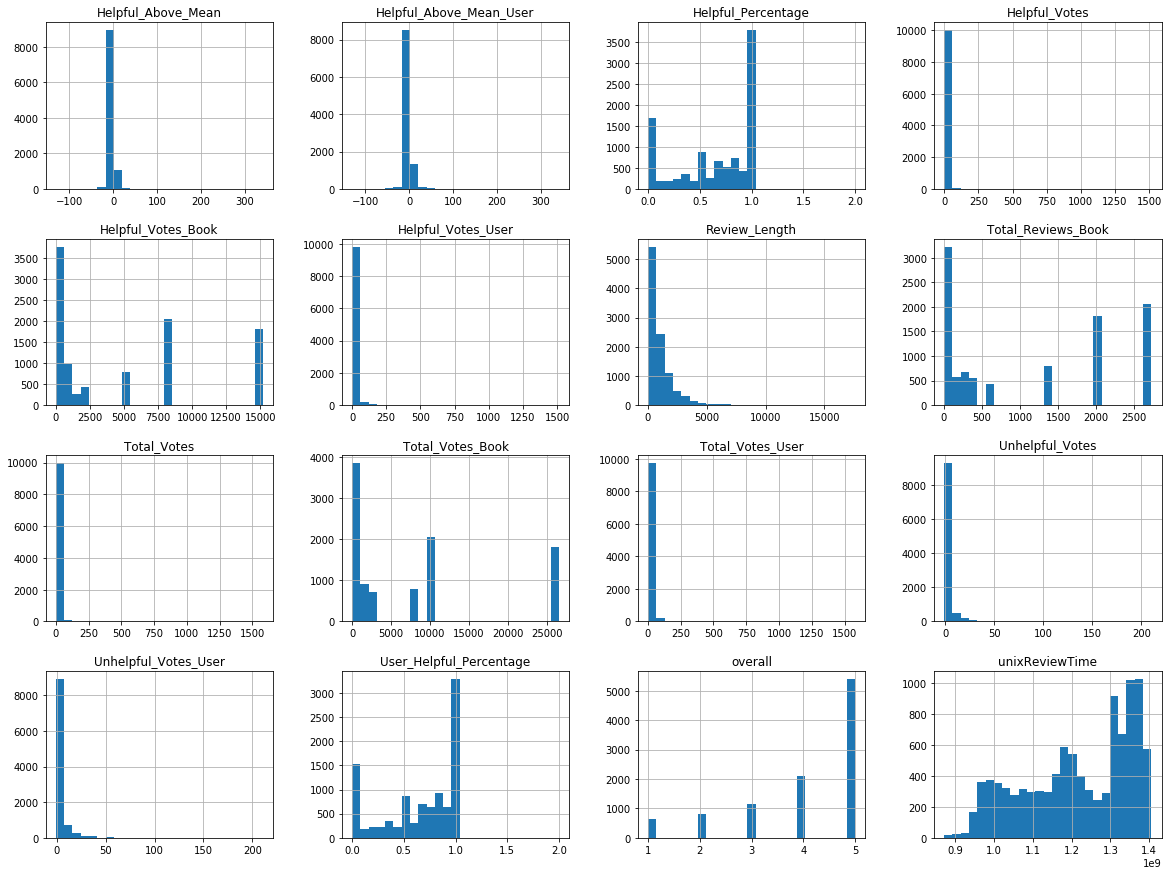

In [182]:
# Display same histograms excluding rows with no votes
df_sub.hist(bins=25, figsize=(20,15))

# Show the plot
plt.show()

Despite removing all rows with 0 votes, the results are nearly the same. The histograms just us a general feel for the data. We will investigate further.

## Helpful Votes / Total Votes

### Scatter Plot

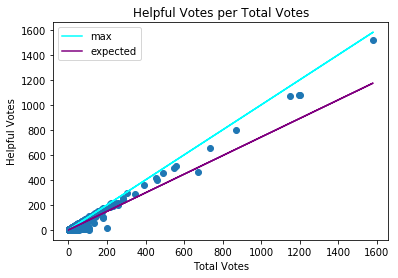

In [183]:
y = df_sub['Helpful_Votes']
x = df_sub['Total_Votes']

plt.ylabel('Helpful Votes')
plt.xlabel('Total Votes')
plt.title('Helpful Votes per Total Votes')

plt.scatter(x,y)

#Since helpful votes cannot exceed total votes, the cyan line represents a maximum. 
maxLine, = plt.plot(x, x, 'cyan', label='max')

#The purple line is the expected value of helpful votes
expectedLine, = plt.plot(x, helpfulPercentage*x, 'purple', label='expected')

plt.legend(handles=[maxLine, expectedLine])
plt.show()

1) This graph is beautifully linear.

2) The more Total Votes, the more percentage of Helpful Votes.

#### Zoom-in

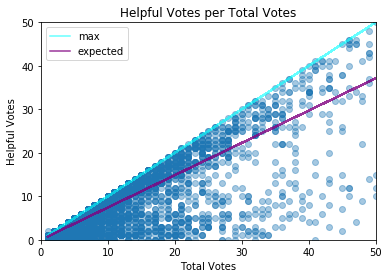

In [184]:
# Generate second plot
y = df_sub['Helpful_Votes']
x = df_sub['Total_Votes']

plt.ylabel('Helpful Votes')
plt.xlabel('Total Votes')
plt.title('Helpful Votes per Total Votes')

plt.scatter(x,y, alpha=0.4)

#Since helpful votes cannot exceed total votes, the cyan line represents a maximum. 
maxLine, = plt.plot(x, x, 'cyan', label='max', alpha=0.6)

#The purple line is the expected value of helpful votes
expectedLine, = plt.plot(x, helpfulPercentage*x, 'purple', label='expected', alpha=0.8)

plt.legend(handles=[maxLine, expectedLine])
plt.xlim(0,50)
plt.ylim(0,50)
plt.show()

1) Not very linear.

2) As Total Votes increase, a high percentage of Helpful Votes appears more likely.

### Correlation Coefficient

In [185]:
def correlation(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# compute correlation of x,y from above plot
coeff = correlation(x,y)
print('Correlation between Total Votes and Helpful Votes is', coeff, '.')

Correlation between Total Votes and Helpful Votes is 0.9850059728807815 .


The correlation coefficient between Total Votes and Helpful Votes is extraorinarily high. This indicates that the data points are very crowded close to the origin. This scatter plot does not distinguish how many points are stacked on top of each other.

### Violin Plot

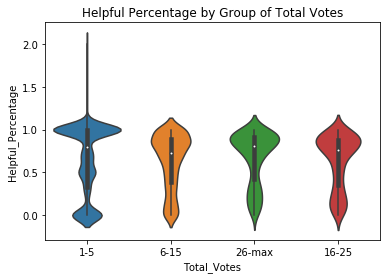

In [187]:
# Create Violin Plot
import seaborn as sns
_ = sns.violinplot(x='Vote_Group', y='Helpful_Percentage', data=df_sub)
_ = plt.xlabel('Total_Votes')
_ = plt.title('Helpful Percentage by Group')

Although not particularly revealing, the violin plot reveals an error in the dataset.

#### Find and remove error point

In [193]:
df.loc[df['Helpful_Percentage']>1.0]

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Helpful_Votes,Total_Votes,Unhelpful_Votes,Helpful_Percentage,Helpful_Above_Mean,Review_Length,Helpful_Votes_User,Total_Votes_User,Unhelpful_Votes_User,User_Helpful_Percentage,Helpful_Above_Mean_User,Total_Reviews_Book,Helpful_Votes_Book,Total_Votes_Book,Vote_Group
1533,0002007770,"[2, 1]",3.0,I was surprised to find that Water for Elephan...,"03 5, 2009",A1FJC36TGXG20D,"Jessica Bender ""aglowgal""","Exciting, boring, then exciting again.",1236211200,2,1,-1,2.0,1.25738,1176.0,2,1,-1,2.0,1.25738,2721,8098,10340,1-5


In [198]:
df.drop(df.index[1533], inplace=True)

In [200]:
df.loc[df['Helpful_Percentage']>1.0]

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Helpful_Votes,Total_Votes,Unhelpful_Votes,Helpful_Percentage,Helpful_Above_Mean,Review_Length,Helpful_Votes_User,Total_Votes_User,Unhelpful_Votes_User,User_Helpful_Percentage,Helpful_Above_Mean_User,Total_Reviews_Book,Helpful_Votes_Book,Total_Votes_Book,Vote_Group


In [202]:
# Recreate reduced DataFrame without error point
df_sub = df[df['Total_Votes']!=0]

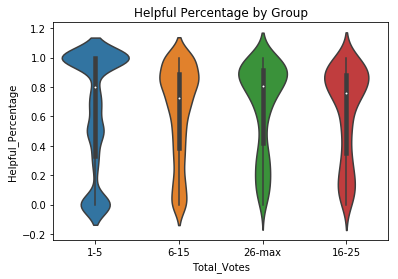

In [203]:
# Create Violin Plot
import seaborn as sns
_ = sns.violinplot(x='Vote_Group', y='Helpful_Percentage', data=df_sub)
_ = plt.xlabel('Total_Votes')
_ = plt.title('Helpful Percentage by Group')

Clearly, 1-5 reviews have the widest range. Otherwise 26-max has the hightest percentage of helpful reviews above average.

In [ ]:
y = df_sub['Helpful_Votes']
x = df_sub['Total_Votes']
plt.hexbin(x, y, bins=(10, 20)) # x & y are 1D arrays of same size
plt.colorbar()

plt.xlim(0,10)
plt.ylim(0,10)

plt.show()

## Unhelpful Votes / Helpful Votes

In [168]:
# compute correlation of x,y from above plot
coeff = correlation(x,y)
print('Correlation between Total Votes and Helpful Votes is', coeff, '.')

correlation(df_sub['Helpful_Votes'], df_sub['Unhelpful_Votes'])

Correlation between Total Votes and Helpful Votes is 0.9850059728807815 .


0.4571208190759965

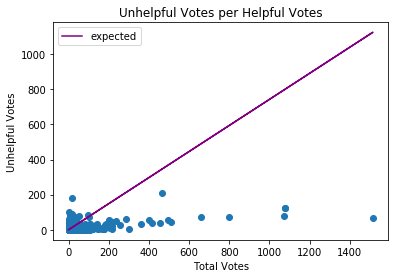

In [169]:
y = df_sub['Unhelpful_Votes']
x = df_sub['Helpful_Votes']

plt.ylabel('Unhelpful Votes')
plt.xlabel('Total Votes')
plt.title('Unhelpful Votes per Helpful Votes')

plt.scatter(x,y)

#The purple line is the expected value of helpful votes
expectedLine, = plt.plot(x, helpfulPercentage*x, 'purple', label='expected')

plt.legend(handles=[expectedLine])
plt.show()

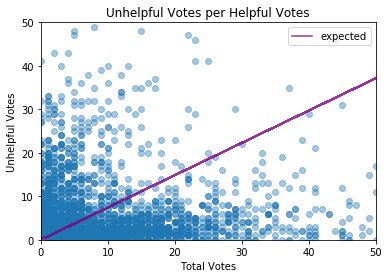

In [170]:
y = df_sub['Unhelpful_Votes']
x = df_sub['Helpful_Votes']

plt.ylabel('Unhelpful Votes')
plt.xlabel('Total Votes')
plt.title('Unhelpful Votes per Helpful Votes')

plt.scatter(x,y, alpha=0.4)

#The purple line is the expected value of helpful votes
expectedLine, = plt.plot(x, helpfulPercentage*x, 'purple', label='expected', alpha=0.8)

plt.legend(handles=[expectedLine])
plt.xlim(0,50)
plt.ylim(0,50)
plt.show()